In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [ ]:
RANDOM_STATE = 143


In [ ]:
raw_train_data = pd.read_csv("train999.csv")
raw_train_data.head()


,id,configuration_item_id,ts,__insert_ts,keys,values
0,1684,30928,2024-06-29 03:00:01,2024-06-29 06:24:05,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '3', '2.3', '46.7', '41.4', '0', '132',..."
1,862,30928,2024-06-10 11:00:00,2024-06-10 13:42:48,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '2', '2.5', '29.4', '32.1', '0', '351',..."
2,1992,24445,2024-05-26 22:00:02,2024-05-26 22:56:03,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '2', '0.5', '70.8', '21.8', '0', '121',..."
3,889,30928,2024-06-11 01:00:59,2024-06-11 03:56:49,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '3', '2.5', '61.6', '25.7', '0', '63', ..."
4,1362,30928,2024-06-22 02:00:00,2024-06-22 05:25:38,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '4', '2.8', '61.5', '27.5', '0', '185',..."


In [ ]:
raw_test_data = pd.read_csv("test999.csv")
raw_test_data.head()


,id,configuration_item_id,ts,__insert_ts,keys,values
0,1106,30928,2024-06-16 05:00:00,2024-06-16 08:00:03,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '3', '2.6', '38.5', '43.9', '0', '203',..."
1,1321,30928,2024-06-21 05:00:01,2024-06-21 07:59:16,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '10', '2.7', '71.2', '22.9', '0', '186'..."
2,2313,24445,2024-06-11 06:30:01,2024-06-11 07:38:51,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '3', '3.8', '35.1', '34.5', '0', '164',..."
3,2274,24445,2024-06-10 02:00:01,2024-06-10 03:23:49,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '3', '0.6', '84.2', '26.2', '0', '282',..."
4,1432,30928,2024-06-23 14:30:00,2024-06-23 17:20:10,"[['meteo_layer_type', 'meteo_cloudiness', 'met...","[['1', '3', '1.5', '66.8', '31.5', '0', '208',..."


In [ ]:
import ast

features = ast.literal_eval(raw_train_data["keys"][0])[0]
features


['meteo_layer_type',
 'meteo_cloudiness',
 'meteo_wind_velocity',
 'meteo_humidity',
 'meteo_t_underroad',
 'meteo_freezing_point',
 'meteo_wind_direction',
 'meteo_dew_point',
 'meteo_t_road',
 'meteo_wind_gusts',
 'meteo_t_air',
 'meteo_air_pressure']

In [ ]:
def get_sensors_data(data, features):
    sensors_data = data.apply(
        lambda x: [float(i) if i != "null" else np.nan for i in ast.literal_eval(x)[0]]
    )

    return pd.DataFrame(sensors_data.values.tolist(), columns=features)


In [ ]:
other_colums = ["id", "configuration_item_id", "ts", "__insert_ts"]

train_data = pd.concat(
    [
        raw_train_data[other_colums],
        get_sensors_data(raw_train_data["values"], features),
    ],
    axis=1,
)
train_data.head()


,id,configuration_item_id,ts,__insert_ts,meteo_layer_type,meteo_cloudiness,meteo_wind_velocity,meteo_humidity,meteo_t_underroad,meteo_freezing_point,meteo_wind_direction,meteo_dew_point,meteo_t_road,meteo_wind_gusts,meteo_t_air,meteo_air_pressure
0,1684,30928,2024-06-29 03:00:01,2024-06-29 06:24:05,1.0,3.0,2.3,46.7,41.4,0.0,132.0,16.9,35.1,4.2,29.5,733.0
1,862,30928,2024-06-10 11:00:00,2024-06-10 13:42:48,1.0,2.0,2.5,29.4,32.1,0.0,351.0,3.3,30.3,4.4,22.0,737.0
2,1992,24445,2024-05-26 22:00:02,2024-05-26 22:56:03,1.0,2.0,0.5,70.8,21.8,0.0,121.0,-4.7,18.6,1.1,0.0,754.0
3,889,30928,2024-06-11 01:00:59,2024-06-11 03:56:49,1.0,3.0,2.5,61.6,25.7,0.0,63.0,11.2,20.7,4.2,18.7,736.0
4,1362,30928,2024-06-22 02:00:00,2024-06-22 05:25:38,1.0,4.0,2.8,61.5,27.5,0.0,185.0,14.9,22.2,6.0,22.7,733.0


In [ ]:
test_data = pd.concat(
    [raw_test_data[other_colums], get_sensors_data(raw_test_data["values"], features)],
    axis=1,
)
test_data.head()


,id,configuration_item_id,ts,__insert_ts,meteo_layer_type,meteo_cloudiness,meteo_wind_velocity,meteo_humidity,meteo_t_underroad,meteo_freezing_point,meteo_wind_direction,meteo_dew_point,meteo_t_road,meteo_wind_gusts,meteo_t_air,meteo_air_pressure
0,1106,30928,2024-06-16 05:00:00,2024-06-16 08:00:03,1.0,3.0,2.6,38.5,43.9,0.0,203.0,14.1,37.2,5.7,29.7,735.0
1,1321,30928,2024-06-21 05:00:01,2024-06-21 07:59:16,1.0,10.0,2.7,71.2,22.9,0.0,186.0,13.0,21.5,6.0,18.3,735.0
2,2313,24445,2024-06-11 06:30:01,2024-06-11 07:38:51,1.0,3.0,3.8,35.1,34.5,0.0,164.0,-13.6,40.4,5.7,0.0,749.0
3,2274,24445,2024-06-10 02:00:01,2024-06-10 03:23:49,1.0,3.0,0.6,84.2,26.2,0.0,282.0,-2.3,24.2,2.4,0.0,748.0
4,1432,30928,2024-06-23 14:30:00,2024-06-23 17:20:10,1.0,3.0,1.5,66.8,31.5,0.0,208.0,18.2,31.2,3.2,24.8,734.0


In [ ]:
train_data["ts"] = pd.to_datetime(train_data["ts"])
train_data["__insert_ts"] = pd.to_datetime(train_data["__insert_ts"])
test_data["ts"] = pd.to_datetime(test_data["ts"])
test_data["__insert_ts"] = pd.to_datetime(test_data["__insert_ts"])


In [ ]:
def show_data(data, ts_column, columns, anomaly_data=None, suptitle=None):
    n_columns = len(columns)

    fig, axes = plt.subplots(n_columns, 1, sharex=True, figsize=(12, 1.5 * n_columns))
    suptitle and fig.suptitle(suptitle)

    for i, column in enumerate(columns):
        sns.lineplot(
            data=data,
            x=ts_column,
            y=column,
            ax=axes[i],
            color="tab:blue",
            errorbar=None,
            estimator=None,
        )

        if anomaly_data is not None:
            sns.scatterplot(
                data=data[anomaly_data[:, i] == 1],
                x=ts_column,
                y=column,
                ax=axes[i],
                color="tab:red",
                zorder=10,
            )

    fig.tight_layout(rect=[0, 0, 1, 0.98 if suptitle else 1])


In [ ]:
train_data[features].isna().sum() / train_data.shape[0]


meteo_layer_type        0.043299
meteo_cloudiness        0.000000
meteo_wind_velocity     0.000000
meteo_humidity          0.000000
meteo_t_underroad       0.000000
meteo_freezing_point    0.043299
meteo_wind_direction    0.000000
meteo_dew_point         0.000000
meteo_t_road            0.000000
meteo_wind_gusts        0.000000
meteo_t_air             0.000000
meteo_air_pressure      0.000000
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(train_data[features])
X_test = std_scaler.transform(test_data[features])
X_train.shape, X_test.shape


((1940, 12), (832, 12))

In [ ]:
from sklearn.ensemble import IsolationForest


def get_submodels(data, contaminations):
    return [
        IsolationForest(
            random_state=RANDOM_STATE, contamination=contamination, n_estimators=50
        ).fit(data[:, column].reshape(-1, 1))
        for column, contamination in zip(range(data.shape[1]), contaminations)
    ]


In [ ]:
contaminations = np.full(12, 0.01)

contaminations[2] = 0.0005
contaminations[3] = 0.001
contaminations[4] = 0.001
contaminations[6] = 0.003
contaminations[7] = 0.005
contaminations[8] = 0.005
contaminations[9] = 0.001
contaminations[10] = 0.004
contaminations[11] = 0.009

submodels = get_submodels(np.nan_to_num(X_train), contaminations)


In [ ]:
def predict(data, submodels):
    data_without_null = np.nan_to_num(data)

    result = np.zeros(data.shape, dtype=int)
    for column, submodel in zip(range(data.shape[1]), submodels):
        result[:, column] = (
            submodel.predict(data_without_null[:, column].reshape(-1, 1)) == -1
        ).astype(int)

    result[np.isnan(data)] = 1

    return result


In [ ]:
from sklearn.metrics import silhouette_score


def print_silhouette_score(X, Y):
    X = np.nan_to_num(X, nan=1e3)
    for i in range(12):
        column = Y[:, i]
        if column.any():
            print(i, silhouette_score(X, column))

    print(silhouette_score(X, (Y.sum(axis=1) > 0).astype(int)))


In [ ]:
train_result = predict(X_train, submodels)


In [ ]:
print_silhouette_score(X_train, train_result)


0 0.9758095877029757
2 -0.8429889764389104
3 -0.8745885381672646
4 -0.8742693520787886
5 0.9937437311686115
7 0.5232407413311605
8 -0.8714684156483113
9 -0.8337511539272172
10 0.7703841973381155
11 0.6444988186164694
0.9214920373089394


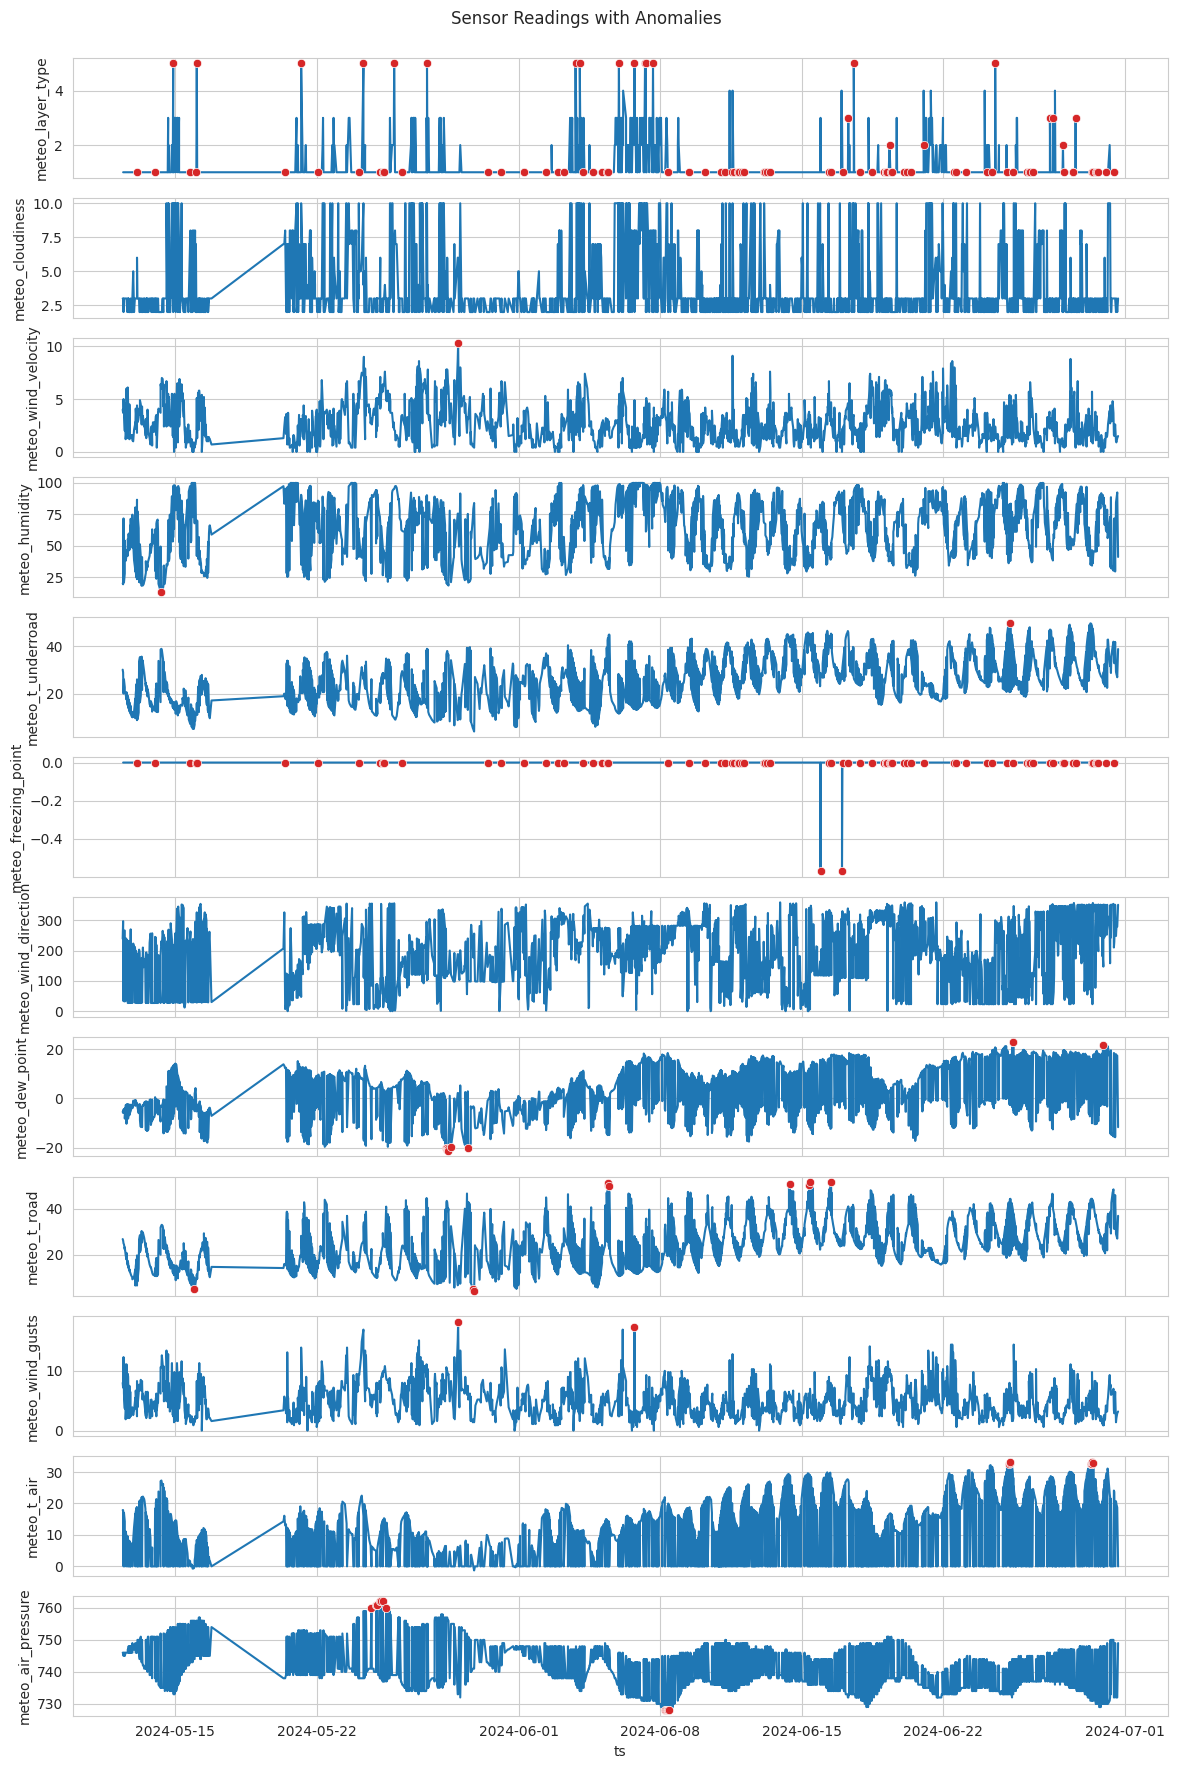

In [ ]:
train_data_without_null = train_data.copy()
train_data_without_null[features] = train_data_without_null[features].interpolate(
    "nearest"
)

show_data(
    train_data_without_null,
    "ts",
    features,
    train_result,
    suptitle="Sensor Readings with Anomalies",
)


In [ ]:
test_result = predict(X_test, submodels)
print_silhouette_score(X_test, test_result)


0 0.9723341113055259
2 -0.8458174978341035
5 0.9932355313937808
8 -0.8776121091160575
9 -0.8458174978341035
10 -0.8758564878549842
11 -0.8657589662531279
0.9282978670454725


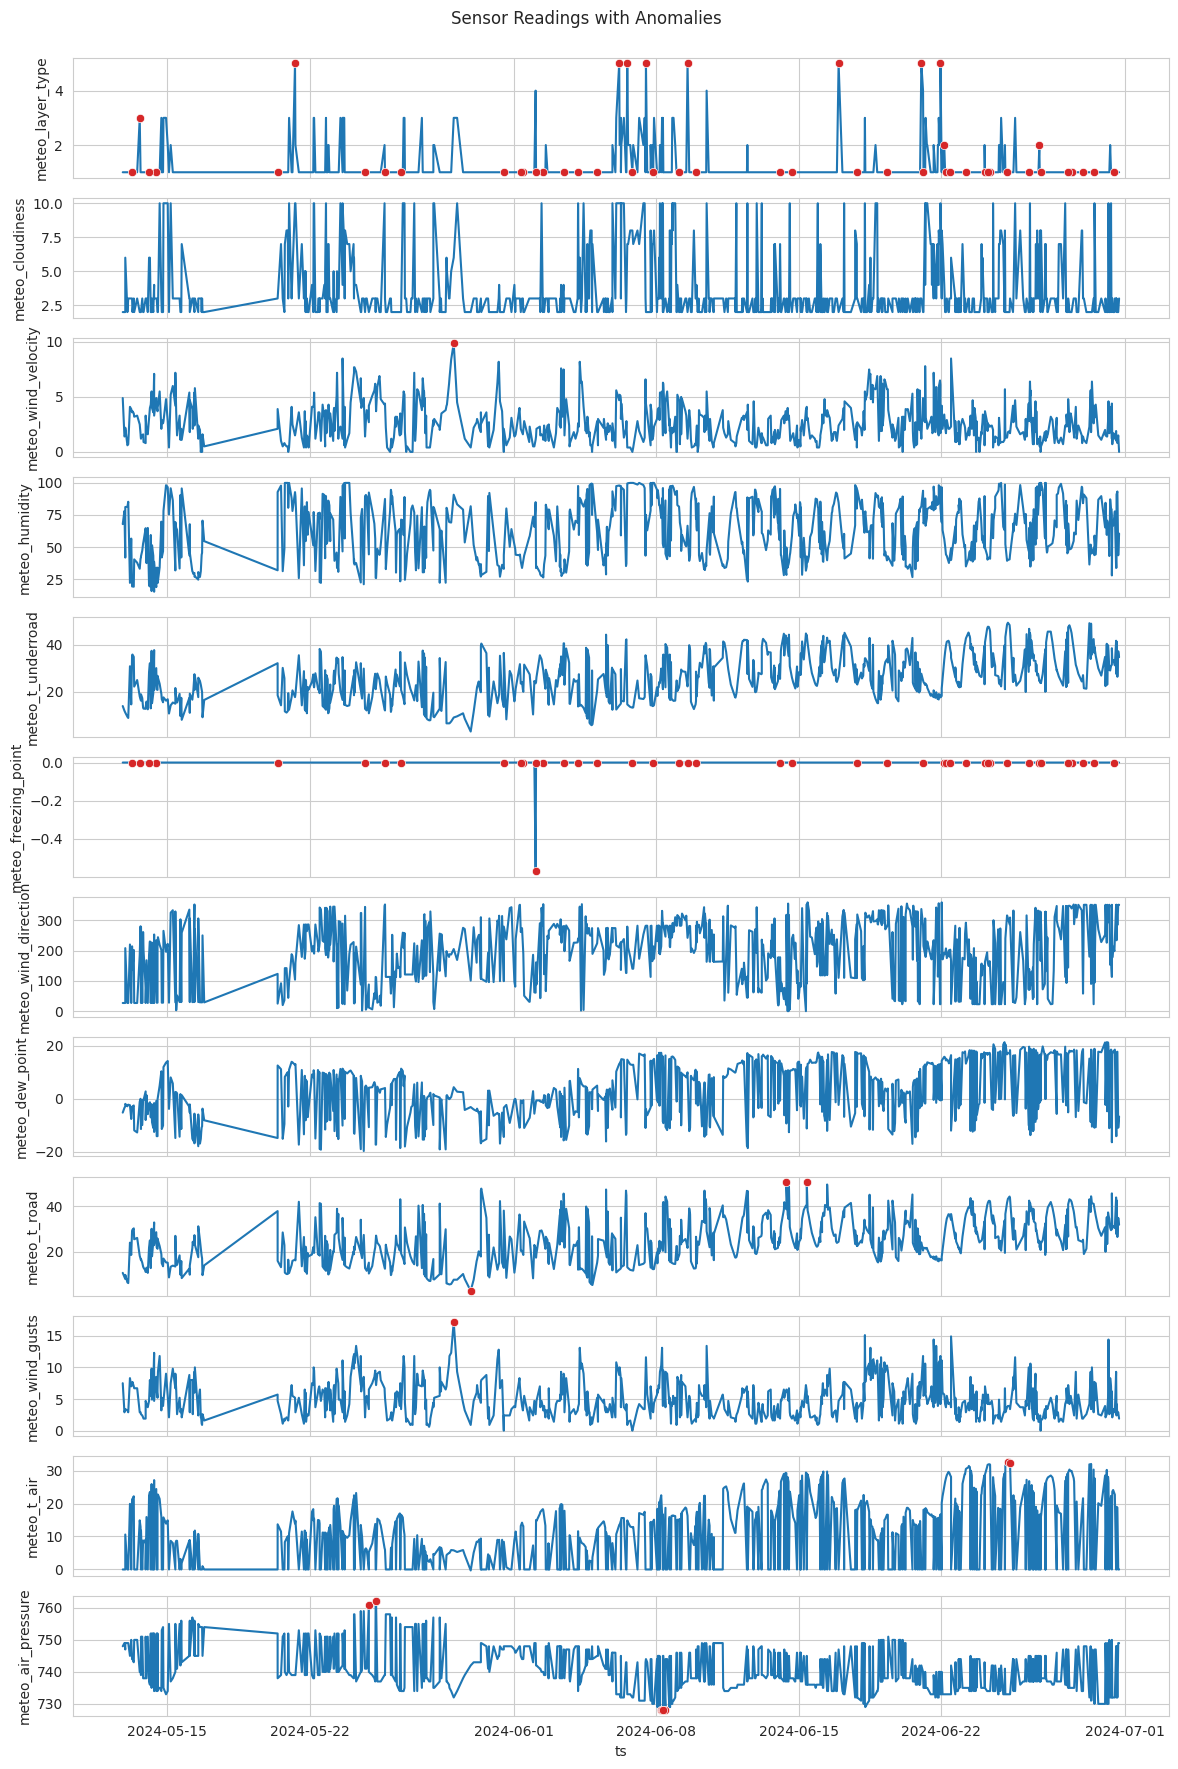

In [ ]:
test_data_without_null = test_data.copy()
test_data_without_null[features] = test_data_without_null[features].interpolate(
    "nearest"
)

show_data(
    test_data_without_null,
    "ts",
    features,
    test_result,
    suptitle="Sensor Readings with Anomalies",
)


In [ ]:
result_df = pd.DataFrame(
    zip(test_data["id"].to_numpy(), [f"{i.tolist()!r}" for i in test_result]),
    columns=["id", "target"],
)
result_df.head()


,id,target
0,1106,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,1321,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,2313,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,2274,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,1432,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [ ]:
result_df.to_csv("result.csv", index=False)
